In [1]:
pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
df=pd.read_csv("/Users/yuepeng/Desktop/MBAN6110 Data Science1/Assignment/Assignment2/experiment_dataset.csv")
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


In [4]:
df.drop('Unnamed: 0', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1000 non-null   int64  
 1   Location    1000 non-null   object 
 2   Device      1000 non-null   object 
 3   Variant     1000 non-null   object 
 4   Time Spent  1000 non-null   float64
 5   CTR         1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [5]:
#By Location - to check user's behavior are similar
df.groupby('Location')[['CTR','Time Spent']].mean()
#Seems like there's no significant difference between locations in terms of CTR and Time Spent.

,CTR,Time Spent
Location,,
Location1,0.110217,22.707286
Location2,0.108517,22.648998
Location3,0.108708,22.787691


In [6]:
# checking CTR - by location
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [7]:
# checking Time Spent - by location
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [10]:
#We still see the CTR and Time Spent are mostly similar in 3 different locations

In [11]:
#By Device - to check user's behavior are similar
df.groupby('Device')[['CTR','Time Spent']].mean()
#Seems like there's no significant difference on different devices in terms of CTR and Time Spent.

,CTR,Time Spent
Device,,
Device1,0.109634,22.635032
Device2,0.109868,22.890021
Device3,0.107993,22.612276


In [12]:
# checking CTR - thru devices
Dev_1 = df[df['Device'] == 'Device1']['CTR']
Dev_2 = df[df['Device'] == 'Device2']['CTR']
Dev_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(Dev_1, Dev_2, Dev_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


In [13]:
# checking CTR - thru devices
Dev_1 = df[df['Device'] == 'Device1']['Time Spent']
Dev_2 = df[df['Device'] == 'Device2']['Time Spent']
Dev_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(Dev_1, Dev_2, Dev_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


In [14]:
#We still see the CTR and Time Spent are mostly similar on 3 different devices

In [9]:
df.groupby('Variant').count()
#Variant A and Variant B are experimented on 330 users respectively
#And 340 for control group 

,Age,Location,Device,Time Spent,CTR
Variant,,,,,
Control,340,340,340,340,340
Variant A,330,330,330,330,330
Variant B,330,330,330,330,330


ANOVA TEST

In [15]:
Variant_A = df[df['Variant'] == 'Variant A']['CTR']
Variant_B = df[df['Variant'] == 'Variant B']['CTR']
Control =df[df['Variant'] == 'Control']['CTR']

f_stat, p_val = stats.f_oneway(Variant_A, Variant_B, Control)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")
#there is a statistically significant difference in CTR between at least one of the Variants and Control groups.

F-statistic: 93.58891593622702
P-value: 5.638952705781554e-38


In [16]:
Variant_A = df[df['Variant'] == 'Variant A']['Time Spent']
Variant_B = df[df['Variant'] == 'Variant B']['Time Spent']
Control =df[df['Variant'] == 'Control']['Time Spent']

f_stat, p_val = stats.f_oneway(Variant_A, Variant_B, Control)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")
#there is a significant difference in Average Time Spent among at least one of the variants.

F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


T-TEST

In [18]:
Variant_A = df[df['Variant'] == 'Variant A']['CTR']
Variant_B = df[df['Variant'] == 'Variant B']['CTR']
Control = df[df['Variant'] == 'Control']['CTR']

t_stat1, p_val1 = stats.ttest_ind(Variant_A, Variant_B)
t_stat2, p_val2 = stats.ttest_ind(Variant_A, Control)
t_stat3, p_val3 = stats.ttest_ind(Variant_B, Control)

print(f"T-statistic: {t_stat1}")
print(f"P-value: {p_val1}")

print(f"T-statistic: {t_stat2}")
print(f"P-value: {p_val2}")

print(f"T-statistic: {t_stat3}")
print(f"P-value: {p_val3}")

#there is strong evidence to suggest a significant difference in Click-Through-Rate (CTR) between both Variants and control group.

T-statistic: 7.08499696316128
P-value: 3.587180487986577e-12
T-statistic: 13.829424737499187
P-value: 1.9602781373243157e-38
T-statistic: 6.4718143491783255
P-value: 1.8743198199982106e-10


In [19]:
Variant_A = df[df['Variant'] == 'Variant A']['Time Spent']
Variant_B = df[df['Variant'] == 'Variant B']['Time Spent']
Control = df[df['Variant'] == 'Control']['Time Spent']

t_stat1, p_val1 = stats.ttest_ind(Variant_A, Variant_B)
t_stat2, p_val2 = stats.ttest_ind(Variant_A, Control)
t_stat3, p_val3 = stats.ttest_ind(Variant_B, Control)

print(f"T-statistic: {t_stat1}")
print(f"P-value: {p_val1}")

print(f"T-statistic: {t_stat2}")
print(f"P-value: {p_val2}")

print(f"T-statistic: {t_stat3}")
print(f"P-value: {p_val3}")

#there is strong evidence to suggest a significant difference in Time Spent between both Variants and control group.

T-statistic: 3.6788175394209075
P-value: 0.0002534771014765265
T-statistic: 12.142363487472364
P-value: 8.488565644996449e-31
T-statistic: 8.174237395991806
P-value: 1.496358076285182e-15


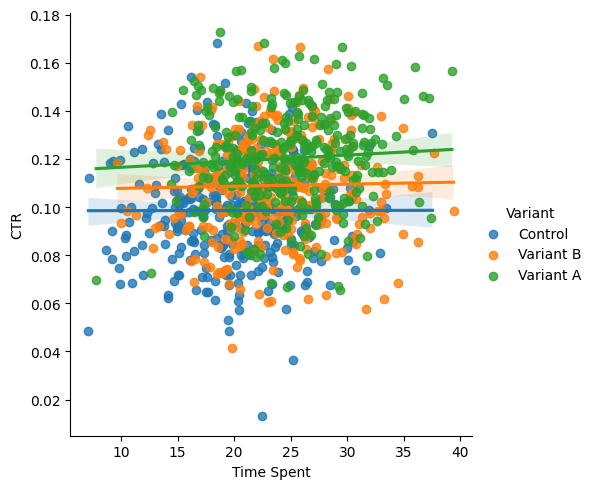

In [20]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Variant')

CHI-SQUARED TEST

In [21]:
# Convert 'CTR' to a categorical variable
df['CTR_cat'] = pd.cut(df['CTR'], bins=[0, 0.10, 0.11, 0.12, 0.14])

# Create a contingency table
contingency_table = pd.crosstab(df['Variant'], df['CTR_cat'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

#The CTR are not distributed equally across the different Variants and control group, indicating that the different variants have a significant impact on the CTR distribution.

Chi-squared: 117.21691236697264
P-value: 6.257182893199448e-23


In [22]:
# Convert 'Time Spent' to a categorical variable
df['Time_Spent_cat'] = pd.cut(df['Time Spent'], bins=[0, 20, 22.5, 25, 30])

# Create a contingency table
contingency_table = pd.crosstab(df['Variant'], df['Time_Spent_cat'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")
#there is a significant association or relationship between the feature variants and Time Spent.

Chi-squared: 85.76491924779707
P-value: 2.291721364778286e-16


non-parametric test, Mann-Whitney, to compare means

In [23]:
Variant_A = df[df['Variant'] == 'Variant A']['CTR']
Variant_B = df[df['Variant'] == 'Variant B']['CTR']
Control = df[df['Variant'] == 'Control']['CTR']

U_stat1, p_val1 = stats.mannwhitneyu(Variant_A, Control)
U_stat2, p_val2 = stats.mannwhitneyu(Variant_B, Control)
U_stat3, p_val3 = stats.mannwhitneyu(Variant_A, Variant_B)

print(f"U-statistic: {U_stat1}")
print(f"P-value: {p_val1}")

print(f"U-statistic: {U_stat2}")
print(f"P-value: {p_val2}")

print(f"U-statistic: {U_stat3}")
print(f"P-value: {p_val3}")
#there is a significant difference in CTR between Variant A, Variant B and control group based on the Mann-Whitney U-test results.
#the observed difference in CTR is unlikely to be due to random chance, supporting the conclusion that there is a meaningful distinction between the two variants and control group in terms of CTR.

U-statistic: 87509.0
P-value: 4.5386476657856684e-36
U-statistic: 71870.0
P-value: 3.058203406783743e-10
U-statistic: 71044.0
P-value: 1.2434380758636484e-11


In [24]:
Variant_A = df[df['Variant'] == 'Variant A']['Time Spent']
Variant_B = df[df['Variant'] == 'Variant B']['Time Spent']
Control = df[df['Variant'] == 'Control']['Time Spent']

U_stat1, p_val1 = stats.mannwhitneyu(Variant_A, Control)
U_stat2, p_val2 = stats.mannwhitneyu(Variant_B, Control)
U_stat3, p_val3 = stats.mannwhitneyu(Variant_A, Variant_B)

print(f"U-statistic: {U_stat1}")
print(f"P-value: {p_val1}")

print(f"U-statistic: {U_stat2}")
print(f"P-value: {p_val2}")

print(f"U-statistic: {U_stat3}")
print(f"P-value: {p_val3}")
#there is a statistically significant difference in Time Spent between Variant A, Variant B and control group. 
#Variant A, Variant B and control group are likely to have distinct effects on Average Time Spent

U-statistic: 83568.0
P-value: 5.562212497183173e-28
U-statistic: 75305.0
P-value: 1.758121945241036e-14
U-statistic: 63471.0
P-value: 0.00023046799187051298


Kruskal-Wallis test

In [27]:
Variant_A = df[df['Variant'] == 'Variant A']['CTR']
Variant_B = df[df['Variant'] == 'Variant B']['CTR']
Control = df[df['Variant'] == 'Variant B']['CTR']

H, pval = stats.kruskal(Variant_A, Variant_B, Control)

print('The test statistic:', H)
print('The p-value of the test:', pval)
#there is a significant difference in CTR among Variant A, Variant B, and Control.

The test statistic: 61.23683907904425
The p-value of the test: 5.0418433657893706e-14


In [28]:
Variant_A = df[df['Variant'] == 'Variant A']['Time Spent']
Variant_B = df[df['Variant'] == 'Variant B']['Time Spent']
Control = df[df['Variant'] == 'Variant B']['Time Spent']

H, pval = stats.kruskal(Variant_A, Variant_B, Control)

print('The test statistic:', H)
print('The p-value of the test:', pval)
#there is a significant difference in Time Spent among Variant A, Variant B, and Control.

The test statistic: 18.097557257636236
The p-value of the test: 0.00011753450254317709


In [25]:
results = df.groupby('Variant').agg({'CTR': 'mean', 'Time Spent': 'mean'})
print(results)
#Both Variant 2 and Variant 1 result in higher average CTR and Time Spent
#And Variant 2 is even higher than Variant 1

                CTR  Time Spent
Variant                        
Control    0.098554   20.070781
Variant A  0.120269   24.805547
Variant B  0.108933   23.343783


In [26]:
ctr_lift=(results.loc['Variant A', 'CTR'] - results.loc['Variant B', 'CTR'])/results.loc['Variant B', 'CTR']*100
print(ctr_lift)

time_spent_lift=(results.loc['Variant A', 'Time Spent'] - results.loc['Variant B', 'Time Spent'])/results.loc['Variant B', 'Time Spent']*100
print(time_spent_lift)

10.406808672992076
6.261900261160683


Question 3: Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

There is a significant lift in CTR between the feature variants (Variant A and Variant B).
Variant A has a 10.41% higher CTR compared to Variant B.

There is a significant lift in Average Time Spent between the feature variants (Variant A and Variant B).
Variant A shows a 6.26% higher Average Time Spent compared to Variant B.

I recommend the engineering team to consider deploying Variant A, as it not only shows a lift in both CTR and Average Time Spent but also has statistically significant differences compared to Variant B and control group.

Question 4: Create a roll-out plan. How quickly will you introduce the feature to your audience?

1. Determine the deployment audience:
    In order to monitor the deployment performance of Variant A. To aggragate the audience into several groups and deploy the feature gradradully. We can initially deploy the variant A to 20% of the audience, which are randomly selected in 3 locations resepectively. So that this can minimize any bias related to age or demographics.

2. Monitor the performance:
    Continuously monitor the CTR & Time Spent during the deployment. Keep track of how variant A performs compared to the control group and variant B.

3. Gather feedback from exposed audience: 
    Collect qualitative feedback from initial 20% of users who are exposed to variant A. This could be done through surveys, interviews, or virtual questionairs within the mobile application.

4. Analyze results: 
    Analyze the collected data and assess the performance of variant A in terms of CTR and Time Spent. Compare the results against the control group and Variant B to evaluate the impact and effectiveness.

5. Make further improvements based on feadback and results: 
    Based on the analysis of the initial deployment on initial 20% of audience, make any necessary adjustments or improvements to variant A. This could include refining the feature, addressing user concerns, or optimizing its functionality.

6. Continue deployment to the rest of the audience: 
    Gradually increase the exposure of variant A to to the rest of the audience, for example, deploy the features to another 30% of the audience in the 2nd round; then 50% in the 3rd round, based on the positive outcomes observed during the previous phase.